In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\Delta\\Downloads\\abalone.csv - abalone.csv.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print(df.Sex.unique())
df.isna().sum()

['M' 'F' 'I']


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df['Sex'] = df["Sex"].map({"M":1, "F":0,"I":2})

<AxesSubplot:>

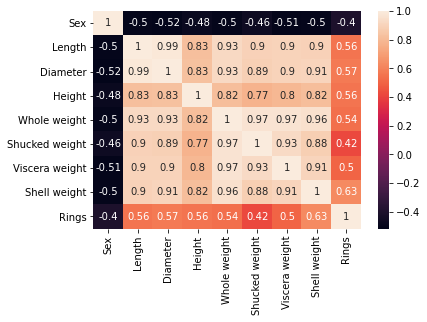

In [5]:
sns.heatmap(df.corr(), annot=True)

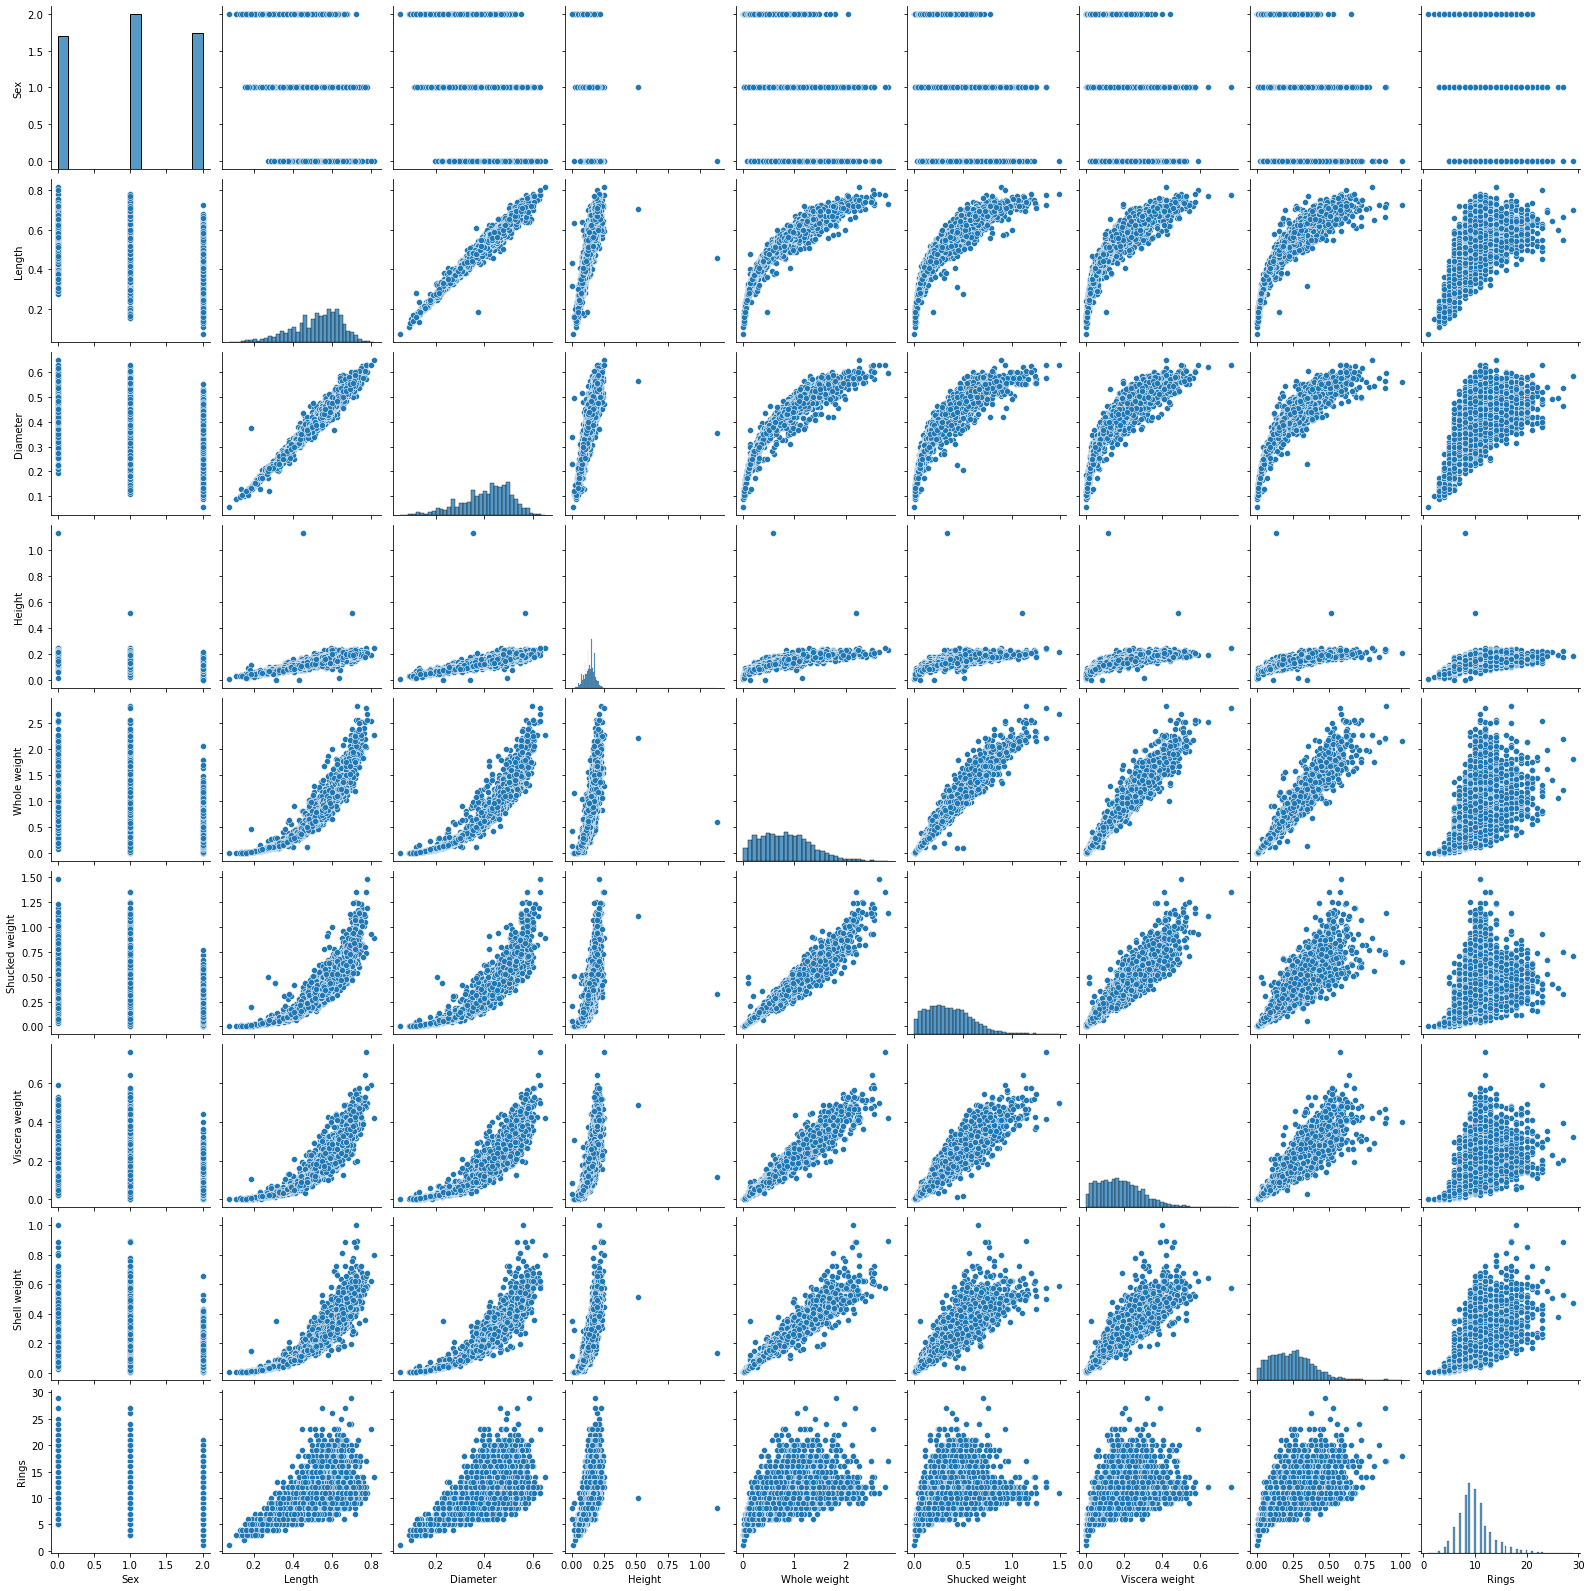

In [6]:
#data is having high auto correlation.
sns.pairplot(data = df)

In [7]:
x = df.drop(columns =['Sex'])
y = df['Sex']

In [8]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [10]:
models = [("rf", RandomForestClassifier(n_estimators=100)),
         ("abc", AdaBoostClassifier(n_estimators=100)),
         ("gbc", GradientBoostingClassifier(n_estimators=100))]

In [11]:
model = VotingClassifier(estimators = models, voting='soft')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_score(ytest, ypred)

0.569377990430622